In [1]:
import pandas as pd

df_origin = pd.read_csv("방위사업청_보유_특허목록_20221231.csv", index_col=0)
title_list = [ title.split('(')[0] for title in df_origin['발명의명칭'].to_list()]

In [11]:
title_list

['이중곡률반경 형성체 리브를 가지는 항공기 타이어',
 '숄더그루브 깊이를 축소시킨 소형 항공기 타이어',
 '포드 인양장치 하중시험용 치구',
 '방독면',
 '방독면',
 '방독면',
 '능동 배열 안테나의 성능 검증 시스템 및 방법',
 '훈련용 유도탄 포드',
 'KUH를 위한 비행시뮬레이터 및 그 제어방법',
 '전술훈련을 위한 충격조끼',
 '전술훈련을 위한 충격조끼',
 '복합 항법 장치를 이용한 고도정보 획득 시스템',
 '전장효과를 제공하는 폭음탄',
 '전장효과를 제공하는 연막탄',
 '발사효과를 제공하는 묘사탄을 구비한 박격포용 축사기',
 '차량 주행 안전장치용 런플랫',
 '워게임 시뮬레이션 엔진 시스템 및 그 동작 방법',
 '훈련용 유도탄 모의기',
 '근접전계시험 데이터 보상방법 및 이를 이용한 레이더 및 센서',
 '가시광선과 적외선 레이저빔이 정렬된 적층형의 레이저 발사기 및 빔 정렬방법',
 '가상환경 내 캐릭터와 훈련자 동작연동을 통한 전술 모의훈련 장치, 모의훈련 연동방법 및 모의훈련 모니터링 방법',
 '무인 항공기 자동착륙 방법',
 '회수 및 불발률 확인 기능이 구비된 시험용 자탄',
 '워터젯',
 '고 경도 장갑 강 벤딩용 금형',
 '복합무기체계의 BIT공유 시스템',
 '방독면용 안경',
 '워게임 모델의 연동 시스템 및 방법',
 '타이어용 런플렛 지지체의 연결 및 분리구조',
 '클램프를 이용한 타이어용 런플렛 지지체의 조립구조',
 '워게임을 위한 무인기 시뮬레이션 시스템',
 '발열기능을 갖는 대공사격훈련용 슬리브',
 '실총기 기반 사격 훈련이 가능한 모의 기관총',
 '실화기 기반 모의 소총',
 '실총기 기반 사격 훈련이 가능한 모의 소총',
 '방호의자용 거치장치',
 '워 게임 시뮬레이션을 위한 레이더 탐지 모의 시스템 및 방법',
 '실화기 베이스 모의 소총',
 '박격포 적재장치',
 '워게임 시뮬레이션 장치 및 이를 이용한 워게임 설정 관리 방법',
 '워게임 사후 검토 상황 재연 시스템

In [15]:
df_origin['발명의명칭'] = title_list
df_origin.to_json("output.json", force_ascii=False, orient="records")

In [13]:
df_origin

,발명의명칭,출원번호,출원일자,등록번호,등록일자,상태
연번,,,,,,
1,이중곡률반경 형성체 리브를 가지는 항공기 타이어,10-2004-0048382,6/25/04,1.00513E+12,8/31/05,등록
2,숄더그루브 깊이를 축소시킨 소형 항공기 타이어,10-2004-0048381,6/25/04,1.00535E+12,12/1/05,등록
3,포드 인양장치 하중시험용 치구,10-2012-064850,6/18/12,1.01207E+12,11/26/12,등록
4,방독면,10-2012-0133170,11/22/12,1.01278E+12,6/18/13,등록
5,방독면,10-2012-0133138,11/22/12,1.01278E+12,6/18/13,등록
...,...,...,...,...,...,...
78,회전체의 센서 데이터를 계측하여 전송하는 방법,10-2012-0046179,5/2/12,10-1274171,6/5/13,등록
79,비행시험 데이터를 이용한 HQS 모델링과 튜닝을 위한 장치 및 그 제어방법,10-2013-0028687,3/18/13,10-1483093,1/9/15,등록
80,탄약통 고정 장치,10-2013-0059589,5/27/13,10-1431111,8/11/14,등록


/Users/basecamp/.pyenv/versions/3.8.16/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


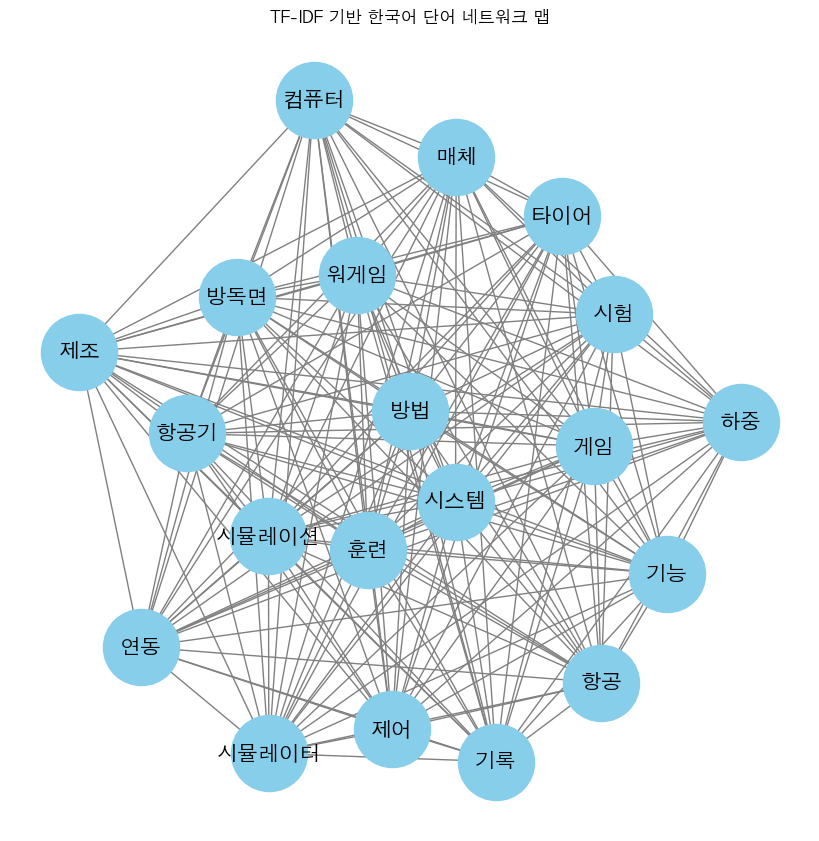

In [2]:
import re
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt
import numpy as np

from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 


# 예시 텍스트 데이터
# documents = parsed_sentences
documents = title_list
# 한국어 형태소 분석기 초기화
okt = Okt()

# 불용어 리스트
stopwords = set([
    "은", "는", "이", "가", "을", "를", "에", "에서", "으로", "와", "과"
    "이다", "하다", "것", "그", "이렇다", "그렇다", "되다", "같다",
    # 
    "아니다", "나타나다",
    "있다", "상기", "가능하다","특징", "보다", "특허", "발명", "또는", "하우",
    "되어다", "공개", "따르다", "이다", "포함", "실시", "구성", "청구", "사용",
    "주식회사", "청구항", "설명", "상태", "전체", "특허법", "모듈", "장치", "도면",
    "구비" , "명칭", "심사", "나타내다", "바라보다", "의하다", "늘다", "10", "100",
    "0154301", "및", "군", "수", "일", "의", "기", "로", "형", "예", "징", "항", "용", '이용', '위',
    '이르다','모의', '공', '워','기반', '효과', '타다', '체'
])

# 전처리 및 토큰화 함수
def preprocess(text):
    # 한글, 공백을 제외한 모든 문자 제거
    text = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", text)
    # 형태소 분석 및 불용어 처리
    tokens = okt.morphs(text, stem=True)
    tokens = [word for word in tokens if word not in stopwords]
    return " ".join(tokens)

def tokenize_and_remove_stopwords(doc):
    tokens = okt.morphs(doc, stem=True)
    tokens = [token for token in tokens if token not in stopwords]
    return tokens

preprocessed_documents = [preprocess(doc) for doc in documents]

# TfidfVectorizer 초기화
vectorizer = TfidfVectorizer(
    tokenizer=tokenize_and_remove_stopwords,
    max_features=20
    )
X = vectorizer.fit_transform(preprocessed_documents)

# 상위 20개 단어 추출
terms = vectorizer.get_feature_names_out()
tfidf_matrix = X.toarray()
sum_tfidf = tfidf_matrix.sum(axis=0)
top_indices = np.argsort(sum_tfidf)[-20:]
top_terms = terms[top_indices]

# 네트워크 그래프 생성
G = nx.Graph()

# 노드 추가
for term in top_terms:
    G.add_node(term)

# 간선 추가 (TF-IDF 값에 기반한 임의의 간선 연결)
threshold = 0.1
for i in range(len(top_terms)):
    for j in range(i + 1, len(top_terms)):
        if tfidf_matrix[:, top_indices[i]].sum() > threshold and tfidf_matrix[:, top_indices[j]].sum() > threshold:
            G.add_edge(top_terms[i], top_terms[j], weight=tfidf_matrix[:, top_indices[i]].sum() + tfidf_matrix[:, top_indices[j]].sum())

# 네트워크 그래프 시각화
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=15, font_weight="bold", edge_color="gray", width=1.0, edge_cmap=plt.cm.Blues, font_family="AppleGothic")
plt.title("TF-IDF 기반 한국어 단어 네트워크 맵")
plt.show()


In [3]:
terms

array(['게임', '기능', '기록', '매체', '방독면', '방법', '시뮬레이션', '시뮬레이터', '시스템', '시험',
       '연동', '워게임', '제어', '제조', '컴퓨터', '타이어', '하중', '항공', '항공기', '훈련'],
      dtype=object)

In [4]:
###
import operator

# TF-IDF 벡터화 결과 확인
print("TF-IDF 행렬 크기:", X.shape)
print("단어 목록:", terms)
print()


# Calculate the mean TF-IDF score for each word across all documents
mean_tfidf_scores = np.mean(X, axis=0)

# Find the index of the word with the highest mean TF-IDF score
most_important_word_index = np.argmax(mean_tfidf_scores)

# Get the most important word using the index
most_important_word = terms[most_important_word_index]


# Display the most important word
print("가장 중요한 단어:", most_important_word)
print()

###

# Calculate the mean TF-IDF score for each word across all documents
mean_tfidf_scores = np.mean(tfidf_matrix, axis=0)

# Iterate over each word and its mean TF-IDF score
for word, score in zip(terms, mean_tfidf_scores.tolist()):
    print(f"Word: {word}, Mean TF-IDF Score: {score}")


aaa = {terms[i]:score for i,score in enumerate(mean_tfidf_scores.tolist())}
bbb = sorted(aaa.items(), reverse=True, key=operator.itemgetter(1))
# bbb

TF-IDF 행렬 크기: (82, 20)
단어 목록: ['게임' '기능' '기록' '매체' '방독면' '방법' '시뮬레이션' '시뮬레이터' '시스템' '시험' '연동' '워게임' '제어'
 '제조' '컴퓨터' '타이어' '하중' '항공' '항공기' '훈련']

가장 중요한 단어: 방법

Word: 게임, Mean TF-IDF Score: 0.03662995305793568
Word: 기능, Mean TF-IDF Score: 0.03496509017569882
Word: 기록, Mean TF-IDF Score: 0.04062771300921489
Word: 매체, Mean TF-IDF Score: 0.028463308125938305
Word: 방독면, Mean TF-IDF Score: 0.04878048780487805
Word: 방법, Mean TF-IDF Score: 0.18860620760551786
Word: 시뮬레이션, Mean TF-IDF Score: 0.07695557354464393
Word: 시뮬레이터, Mean TF-IDF Score: 0.035765796623170844
Word: 시스템, Mean TF-IDF Score: 0.14984760995169633
Word: 시험, Mean TF-IDF Score: 0.047814190132360435
Word: 연동, Mean TF-IDF Score: 0.028646705016753832
Word: 워게임, Mean TF-IDF Score: 0.0604082834165819
Word: 제어, Mean TF-IDF Score: 0.04245973056428617
Word: 제조, Mean TF-IDF Score: 0.023901282619343243
Word: 컴퓨터, Mean TF-IDF Score: 0.018479113562609704
Word: 타이어, Mean TF-IDF Score: 0.04273103961737267
Word: 하중, Mean TF-IDF Score: 0.02688777

In [5]:
def convert_to_ts_format(graph_data):
    nodes = []
    edges = []

    # 노드와 엣지 정보 추출
    for edge, weight in graph_data.items():
        source, target = edge
        weight_label = f"{weight:.2f}"

        # 노드 추가
        if source not in [node['id'] for node in nodes]:
            nodes.append({"id": source, "label": source})
        if target not in [node['id'] for node in nodes]:
            nodes.append({"id": target, "label": target})

        # 엣지 추가
        edge_id = f"{source}-{target}"
        edges.append({"source": source, "target": target, "id": edge_id, "label": weight_label})

    return {"nodes": nodes, "edges": edges}


data = {(u, v): round(d['weight'], 2) for u, v, d in G.edges(data=True)}

ts_formatted_data = convert_to_ts_format(data)
print(ts_formatted_data["nodes"])
print(ts_formatted_data["edges"])


[{'id': '컴퓨터', 'label': '컴퓨터'}, {'id': '제조', 'label': '제조'}, {'id': '하중', 'label': '하중'}, {'id': '매체', 'label': '매체'}, {'id': '연동', 'label': '연동'}, {'id': '항공', 'label': '항공'}, {'id': '기능', 'label': '기능'}, {'id': '시뮬레이터', 'label': '시뮬레이터'}, {'id': '게임', 'label': '게임'}, {'id': '기록', 'label': '기록'}, {'id': '제어', 'label': '제어'}, {'id': '타이어', 'label': '타이어'}, {'id': '시험', 'label': '시험'}, {'id': '방독면', 'label': '방독면'}, {'id': '항공기', 'label': '항공기'}, {'id': '워게임', 'label': '워게임'}, {'id': '시뮬레이션', 'label': '시뮬레이션'}, {'id': '훈련', 'label': '훈련'}, {'id': '시스템', 'label': '시스템'}, {'id': '방법', 'label': '방법'}]
[{'source': '컴퓨터', 'target': '제조', 'id': '컴퓨터-제조', 'label': '3.48'}, {'source': '컴퓨터', 'target': '하중', 'id': '컴퓨터-하중', 'label': '3.72'}, {'source': '컴퓨터', 'target': '매체', 'id': '컴퓨터-매체', 'label': '3.85'}, {'source': '컴퓨터', 'target': '연동', 'id': '컴퓨터-연동', 'label': '3.86'}, {'source': '컴퓨터', 'target': '항공', 'id': '컴퓨터-항공', 'label': '4.30'}, {'source': '컴퓨터', 'target': '기능', 'id': '컴퓨터-기능', 'lab

In [6]:
terms.tolist()

['게임',
 '기능',
 '기록',
 '매체',
 '방독면',
 '방법',
 '시뮬레이션',
 '시뮬레이터',
 '시스템',
 '시험',
 '연동',
 '워게임',
 '제어',
 '제조',
 '컴퓨터',
 '타이어',
 '하중',
 '항공',
 '항공기',
 '훈련']

In [7]:
li = list(zip(terms, mean_tfidf_scores.tolist()))

In [8]:
value = [round(e[1],3)*1000 for e in li]

In [9]:
df = pd.DataFrame({'text':terms.tolist(), 'value':value})

df.to_json(force_ascii=False, orient='records')

'[{"text":"게임","value":37.0},{"text":"기능","value":35.0},{"text":"기록","value":41.0},{"text":"매체","value":28.0},{"text":"방독면","value":49.0},{"text":"방법","value":189.0},{"text":"시뮬레이션","value":77.0},{"text":"시뮬레이터","value":36.0},{"text":"시스템","value":150.0},{"text":"시험","value":48.0},{"text":"연동","value":29.0},{"text":"워게임","value":60.0},{"text":"제어","value":42.0},{"text":"제조","value":24.0},{"text":"컴퓨터","value":18.0},{"text":"타이어","value":43.0},{"text":"하중","value":27.0},{"text":"항공","value":34.0},{"text":"항공기","value":51.0},{"text":"훈련","value":91.0}]'